In [1]:
#!sed '/^>/! s/[^actgACTG]/N/g' cov/sequences.fasta > cov/sequences_cleaned.fasta

#!arg-sample --fasta cov/sequences.fasta -m 4e-5 -r 2e-6 -t 20 --maxtime 300 --delta 0.8 -N 15 -n 1000 -c 1 --mask-cluster 2, 5 -o cov/cov.sample/out --overwrite 

In [2]:
import pandas as pd
from pandas import DataFrame as df

In [3]:
df = pd.read_csv('./cov/cov.sample/out.stats',sep='\t')

In [4]:
df = df.iloc[1: , :]
df.rename(columns={"iter": "MCMC iterations"}, inplace=True)
df.head()

,stage,MCMC iterations,prior,prior2,likelihood,joint,recombs,noncompats,arglen
1,resample,0,-75.681293,-62.193787,-44227.037648,-44302.718941,6,2,7.698493e+06
2,resample,1,-110.556485,-81.733869,-44222.747846,-44333.304331,9,2,7.545105e+06
3,resample,2,-110.556485,-81.733869,-44222.747846,-44333.304331,9,2,7.545105e+06
4,resample,3,-80.167637,-54.426696,-44234.202992,-44314.370629,7,3,7.559877e+06
5,resample,4,-92.698515,-64.610932,-44228.580078,-44321.278593,8,3,7.701830e+06


In [5]:
recomb_rates = []

for index, row in df.iterrows():
    recomb_rates.append(row['recombs']/row['arglen'])

<AxesSubplot:xlabel='MCMC iterations', ylabel='prior'>

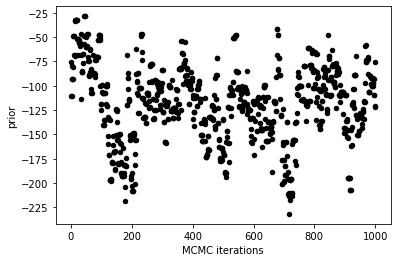

In [14]:
df.plot.scatter(x = 'MCMC iterations', y = 'prior', c='black')

<AxesSubplot:xlabel='MCMC iterations', ylabel='likelihood'>

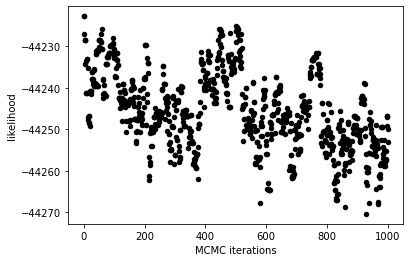

In [15]:
df.plot.scatter(x = 'MCMC iterations', y = 'likelihood', c='black')

<AxesSubplot:xlabel='MCMC iterations', ylabel='joint'>

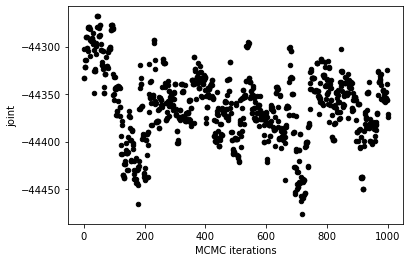

In [13]:
df.plot.scatter(x = 'MCMC iterations', y = 'joint', c='black')

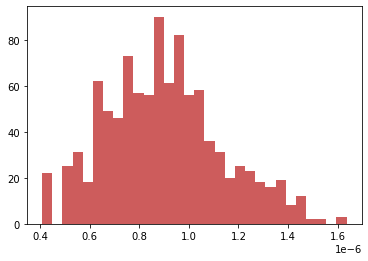

In [12]:
from matplotlib import pyplot as plt
plt.hist(recomb_rates, bins=30, color='indianred')  # density=False would make counts
plt.show()